In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
#2 Check the shape of the DataFrame (rows, columns)

print("Shape of the DataFrame : " , df.shape)


Shape of the DataFrame :  (545, 13)


In [3]:


#3 Look at the data types of the columns

print("Data types of the df : " ,df.dtypes)



Data types of the df :  price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [4]:
#4 Check for missing  values if any, replace with appropriate values

print("Missing values : ", df.isnull().sum())

Missing values :  price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
#5 Prepare  X (independent variables) and y (dependent variable)

x = df.drop(columns="price")
y = df["price"]



IndexError: index 6 is out of bounds for axis 0 with size 6

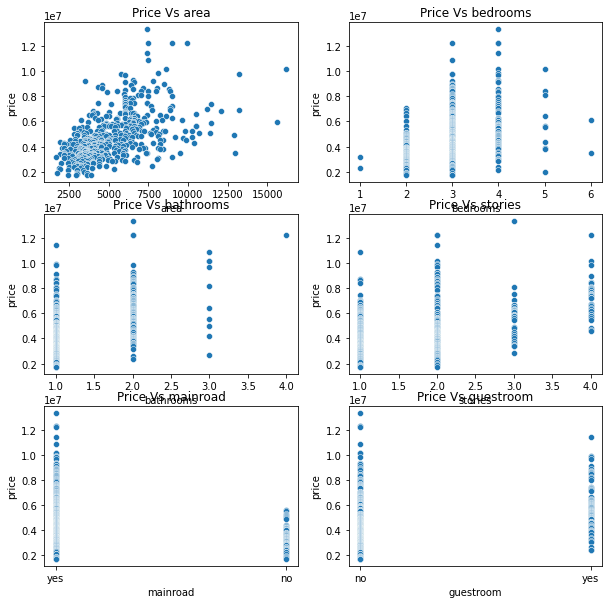

In [22]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots


import matplotlib.pyplot as plt
import seaborn as sns

cols = x.select_dtypes(include="number").columns

fig, axes = plt.subplots(3,2,figsize=(10,10))
axes = axes.flatten()

for i,col in enumerate(cols):
    cur_axis = axes[i]
    sns.scatterplot(x=df[col],y=y,ax = cur_axis)
    cur_axis.set_xlabel(col)
    cur_axis.set_ylabel("price")
    cur_axis.set_title(f"Price Vs {col}")

plt.delaxes(axes[-1]) # deletes the specified axis 
plt.tight_layout()  
plt.show()

In [7]:
#7 Encoding categorical data in X


from sklearn.preprocessing import LabelEncoder

cols = x.select_dtypes(include="object").columns
for col in cols : 
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])

x.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [8]:
#8  Avoiding the Dummy Variable Trap


# pd.get_dummies(df[col], drop_first=True)


In [9]:
#9 Apply feature scaling on numerical variables


from sklearn.preprocessing import StandardScaler

cols = df.select_dtypes(include="number").columns.to_list()
cols.remove("price")

scaler = StandardScaler()
x[cols] = scaler.fit_transform(x[cols])

x.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,0
1,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,0
2,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1
3,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,0
4,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,0


In [10]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

x_train.shape , x_test.shape, y_train.shape, y_test.shape


((381, 12), (164, 12), (381,), (164,))

In [11]:
#11 Fitting Multiple Linear Regression to the Training


from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model.
model = LinearRegression()

# Fit the model on the training data (X_train and y_train)
model.fit(x_train, y_train)

# Output the model's intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 4071726.923233441
Coefficients: [ 548676.87299684   61007.57353683  560930.5907925   360373.26651063
  408320.46478164  279534.04145787  484980.21525134  619934.34714776
  680006.92089594  261749.09078536  509441.46380309 -198031.32519469]


In [12]:
#12 Predict on the train set and calculate the error = y_pred - y_train

y_pred_tr = model.predict(x_train)

error_tr = y_pred_tr - y_train

error_tr[:5]

126   -5.477012e+05
363   -1.499996e+05
370    7.643610e+05
31    -1.977171e+06
113    2.678948e+05
Name: price, dtype: float64

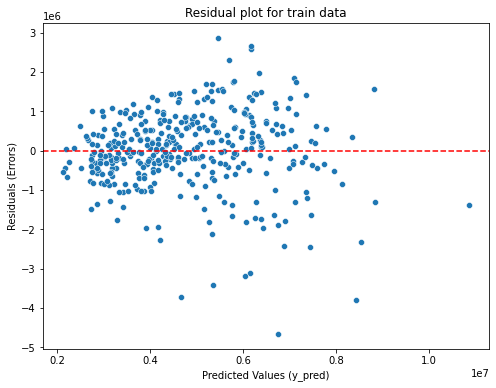

In [13]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_tr, y = error_tr )
plt.axhline(y=0, color='red', linestyle='dashed')  # Reference line at y = 0
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot - Test")
plt.title("Residual plot for train data")
plt.show()


In [14]:
#14  Predic on the test set

y_pred_te = model.predict(x_test)

error_te = y_pred_te - y_test

error_te[:5]


316    1.347509e+06
77     4.471855e+05
360   -6.545376e+05
90    -1.963055e+06
493    5.159837e+05
Name: price, dtype: float64

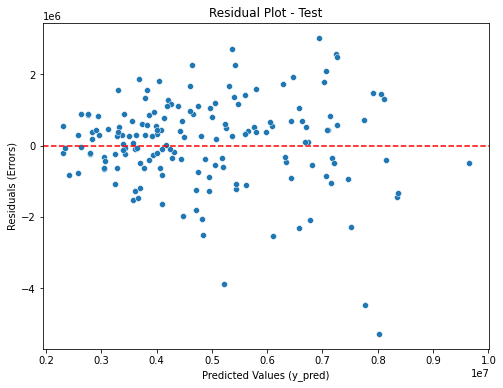

In [15]:
#15 Residual plot - plot y_pred in x axis and errors in y axis


# Plot residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_te, y=error_te)
plt.axhline(y=0, color='red', linestyle='dashed')  # Reference line at y = 0
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot - Test")
plt.show()

In [16]:
#16 Print Mean Squared Error and R Squared Value


from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_pred_te)
r2 = r2_score(y_test,y_pred_te)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R²) Value: {r2:.4f}")

Mean Squared Error (MSE): 1535047758428.05
R-Squared (R²) Value: 0.6435


In [17]:
# Manual calculation

#  mse = sum of (yact - ypred)^2 / n
import numpy as np

n = y_test.shape[0]
mse_man = np.sum((y_test - y_pred_te)**2) / n

mse_man


np.float64(1535047758428.0503)

In [18]:
# r2 = 1 - ss_res / ss_tot

# ss_res = sum(yact - ypred)^2
# ss_tot = sum(yact - ymean)^2

ss_res = np.sum((y_test - y_pred_te)**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)

r2_man = 1 - ss_res / ss_tot

r2_man

np.float64(0.6435419628959106)

In [19]:


#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

def adj_r2(r2,n,k) :
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

cols = x.columns.to_list()

feats = [cols[:3],
         cols[:4],
         cols[:5],
         cols
        ]

result = []

for feat in feats : 
    x_sub = x[feat]
    x_train, x_test, y_train, y_test = train_test_split(x_sub,y,test_size=0.2,random_state=42)
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    n = x_test.shape[0]
    k = x_test.shape[1]
    adj = adj_r2(r2,n,k)
    result.append({"Features" : feat, "R2 score" : r2 , "Adj R2 score" : adj})

result_df = pd.DataFrame(result) # for readability 
print(result_df)



                                            Features  R2 score  Adj R2 score
0                        [area, bedrooms, bathrooms]  0.455930      0.440385
1               [area, bedrooms, bathrooms, stories]  0.513759      0.495057
2     [area, bedrooms, bathrooms, stories, mainroad]  0.528473      0.505584
3  [area, bedrooms, bathrooms, stories, mainroad,...  0.649475      0.605660


In [21]:
#manual regression model

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)


#  concatenate with 1s for intercept 
x_b = np.c_[np.ones((x_train.shape[0],1)), x_train]

#  theta = [ [ (x^T . x) ^(-1) ] . x^T ] . y
theta = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y_train


# y_cap = xtest_w * theta
def predict(x_test):
    x_test = np.c_[np.ones((x_test.shape[0],1)) , x_test]
    return x_test @ theta

y_pred = predict(x_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

# Print the results
print(f"Mean Squared Error (MSE)  : {mse:.2f}")
print(f"R-Squared (R²) Value: {r2:.4f}")


Mean Squared Error (MSE)  : 1535047758428.05
R-Squared (R²) Value: 0.6435
